# Project 4: Chapter 4 - Functional Programming: Rudimentary Probability, Statistics, and Analytics

## Statistical Functions

In [1]:
import random

In [2]:
def total(lst):
    total_ = 0
    for val in lst:
        total_+= val
#     n = len(lst)
#     for i in range(n):
#         total_ += lst[i]
    return total_

X1 = [i for i in range(3,31, 3)]
X2 = [random.randint(0,10) for i in range(10)]
print("X1:",X1)
print("X2", X2)

X1: [3, 6, 9, 12, 15, 18, 21, 24, 27, 30]
X2 [8, 5, 4, 3, 9, 1, 1, 2, 2, 5]


In [3]:
total1 = total(X1)
total2 = total(X2)
print("Total of X1:",total1)
print("Total of X2:", total2)

Total of X1: 165
Total of X2: 40


In [4]:
def mean(lst):
    n = len(lst)
    mean_ = total(lst) / n
    return mean_

In [5]:
print("Mean of X1:", mean(X1))
print("Mean of X2", mean(X2))

Mean of X1: 16.5
Mean of X2 4.0


In [6]:
import numpy as np
np.mean(X1), np.mean(X2)

(16.5, 4.0)

### Median

The median is either 1) the value that appears exactly in the middle of the ordered list if the length of the list is odd or 2) the average of the two middle values that appear in the ordered list if the length of the list is even. 

In [7]:
def median(lst):
    n = len(lst)
    lst = sorted(lst)
    # the percent operator calculates the remander
    # Case 1: list is odd in length
    ## just select value from middle of list
    if n % 2 != 0:
        # coerce float to int
        middle_index = int((n - 1) / 2)
        median_ = lst[middle_index]
    # Case 2: list is even in length
    ## take the average of the middle two values
    else:
        upper_middle_index = int(n / 2)
        lower_middle_index = upper_middle_index - 1
        median_ = mean(lst[lower_middle_index : upper_middle_index + 1])
    return median_
median1 = median(X1)
median2 = median(X2)
print("Median of X1:", median1)
print("Median of X2:", median2)

Median of X1: 16.5
Median of X2: 3.5


In [8]:
def mode(lst):
    # use to record value(s)
    max_count = 0
    counter_dict = {}
    # use set if you don't want to define a value as zero multiple times
#     for value in set(lst):
    for value in lst:
        counter_dict[value] = 0
    for value in lst:
        counter_dict[value] += 1
    max_count = max(counter_dict.values())
    mode_ = [key for key in counter_dict.keys() if counter_dict[key] == max_count]
#     mode_ = [key for key, count in counter_dict.items() if count == max_count]
    
    return mode_

print("Mode of X1:", mode(X1))
print("Mode of X2:", mode(X2))

Mode of X1: [3, 6, 9, 12, 15, 18, 21, 24, 27, 30]
Mode of X2: [5, 1, 2]


In [9]:
def variance(lst, sample = True):
    list_mean = mean(lst)
    # use n to calculate average of sum squared diffs
    n = len(lst)
    DoF = n - 1
    sum_sq_diff = 0
    for val in lst:
        sum_sq_diff += (val - list_mean) ** 2
    # Case 1: list of values represent entire population
    if sample == False:
        # normalize result by dividing by n
        variance_ = sum_sq_diff / n
    # Case 2: list of values represents only a sample (subset)
    ## of the population
    else:
        # divide by DoF for sample
        variance_ = sum_sq_diff / DoF
    return variance_

In [10]:
print("Variance of X1:", variance(X1))
print("Variance of X2:", variance(X2))

Variance of X1: 82.5
Variance of X2: 7.777777777777778


Text(0, 4.0, 'Mean(X2)')

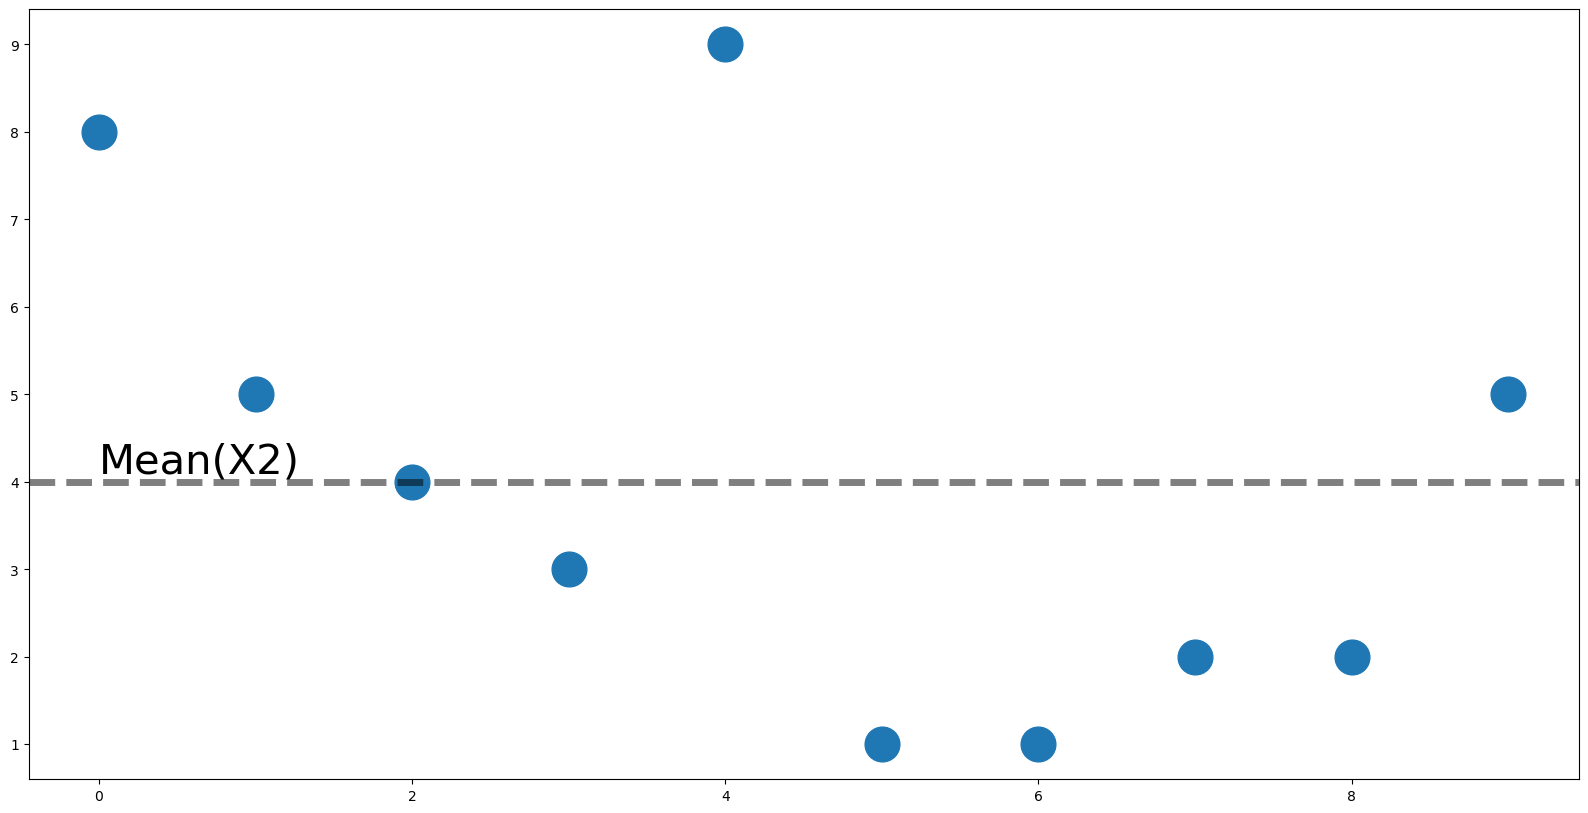

In [11]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (20,10))
ax.plot(X2, ls = "", marker=".", markersize=50)
ax.axhline(mean(X2), linewidth = 5, alpha = .5, ls = "--", color = "k")
ax.text(0, mean(X2), "Mean(X2)", va = "bottom", fontsize = 30)
# for x in X2:
#     ax.axvline(xmin = x, xmax = mean(X2))

In [12]:
def SD(lst, sample = True):
    # Standard deviation is the square root of variance
    SD_ = variance(lst, sample) ** (1/2)
    return SD_

print("SD of X1:", SD(X1))
print("SD of X2:", SD(X2))

SD of X1: 9.082951062292475
SD of X2: 2.788866755113585


In [13]:
def STE(lst, sample = True):
    n = len(lst)
    se = SD(lst, sample) / n ** (1/2)
    
    return se
print("SE of X1:", STE(X1))
print("SE of X2:", STE(X2))

SE of X1: 2.872281323269014
SE of X2: 0.8819171036881968


In [14]:
np.inf, np.inf*-1

(inf, -inf)

### Covariance

$cov_{pop}(x,y) = \frac{\sum_{i=0}^{n-1}{(x_i - x_{mean})(y_i - y_{mean})}}{n}$

In [15]:
def covariance(x, y, sample = False):
    meanx = mean(x)
    meany = mean(y)
    
    cov = 0
    nx = len(x)
    ny = len(y)
    if nx == ny:
        n = nx
        for i in range(n):
            cov += (x[i] - meanx) * (y[i] - meany)
        if sample == False:
            cov = cov / n
        else:
            cov = cov / (n-1)
        return cov
    else:
        print("List lengths are not equal.", nx, 
              "!=", ny)


In [22]:
covx1x2 = covariance(X1, X2, sample = True)
covx1x2

-12.0

In [21]:
covx1x2 = covariance(X1, X2[1:])
# covx1x2

List lengths are not equal. 10 != 9


### Correlation
$corr(x,y) = \frac{cov(x,y)}{\sigma_x \sigma_y}$

$corr(x,y) = \rho_{xy}$

Correlation normalizes $cov(x,y)$ ($\sigma_{xy}$) by dividing out the product of $\sigma_x$ and $\sigma_y$.

In [27]:
def correlation(x,y):
    cov = covariance(x,y)
    SDx = SD(x)
    SDy = SD(y)
    corr = cov / (SDx * SDy)
    return corr
corr_X1_X2 = correlation(X1,X2)
corr_X1_X2, corr_X1_X2 ** 2

(-0.42635269833393036, 0.18177662337662343)

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [63]:
simpsons = {j: [np.random.normal() * 20 + int(i/10)\
               for i in range(1000)] for j in range(10)}
# pd.DataFrame(simpsons).tail()
print(simpsons.keys())

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


In [64]:
values = []
for j in simpsons.keys():
    ix_interval = j * 100
    simpsons[j] = pd.DataFrame(
        simpsons[j], 
        # shift the index (x values) to the right)
        index = np.arange(
            ix_interval,              # shift y values down
            len(simpsons[j]) + ix_interval)).sub(j*35)
    # column for x
    simpsons[j]["Index"] = simpsons[j].index
    # column for entity that defines data generating process
    simpsons[j]["Entity"] = int(j)
    values = values + list(simpsons[j].values)
stacked_simpsons = pd.DataFrame(
    values,
    columns = ["y", "x", "Entity"])
stacked_simpsons.head()

,y,x,Entity
0,-14.282190,0.0,0.0
1,3.924372,1.0,0.0
2,-12.711842,2.0,0.0
3,16.980809,3.0,0.0
4,-14.777014,4.0,0.0


In [68]:
stacked_simpsons.corr()["x"]["y"]

-0.47356276942204634

Text(0.5, 1.0, 'Data appears to be negatively correlated\n-0.47')

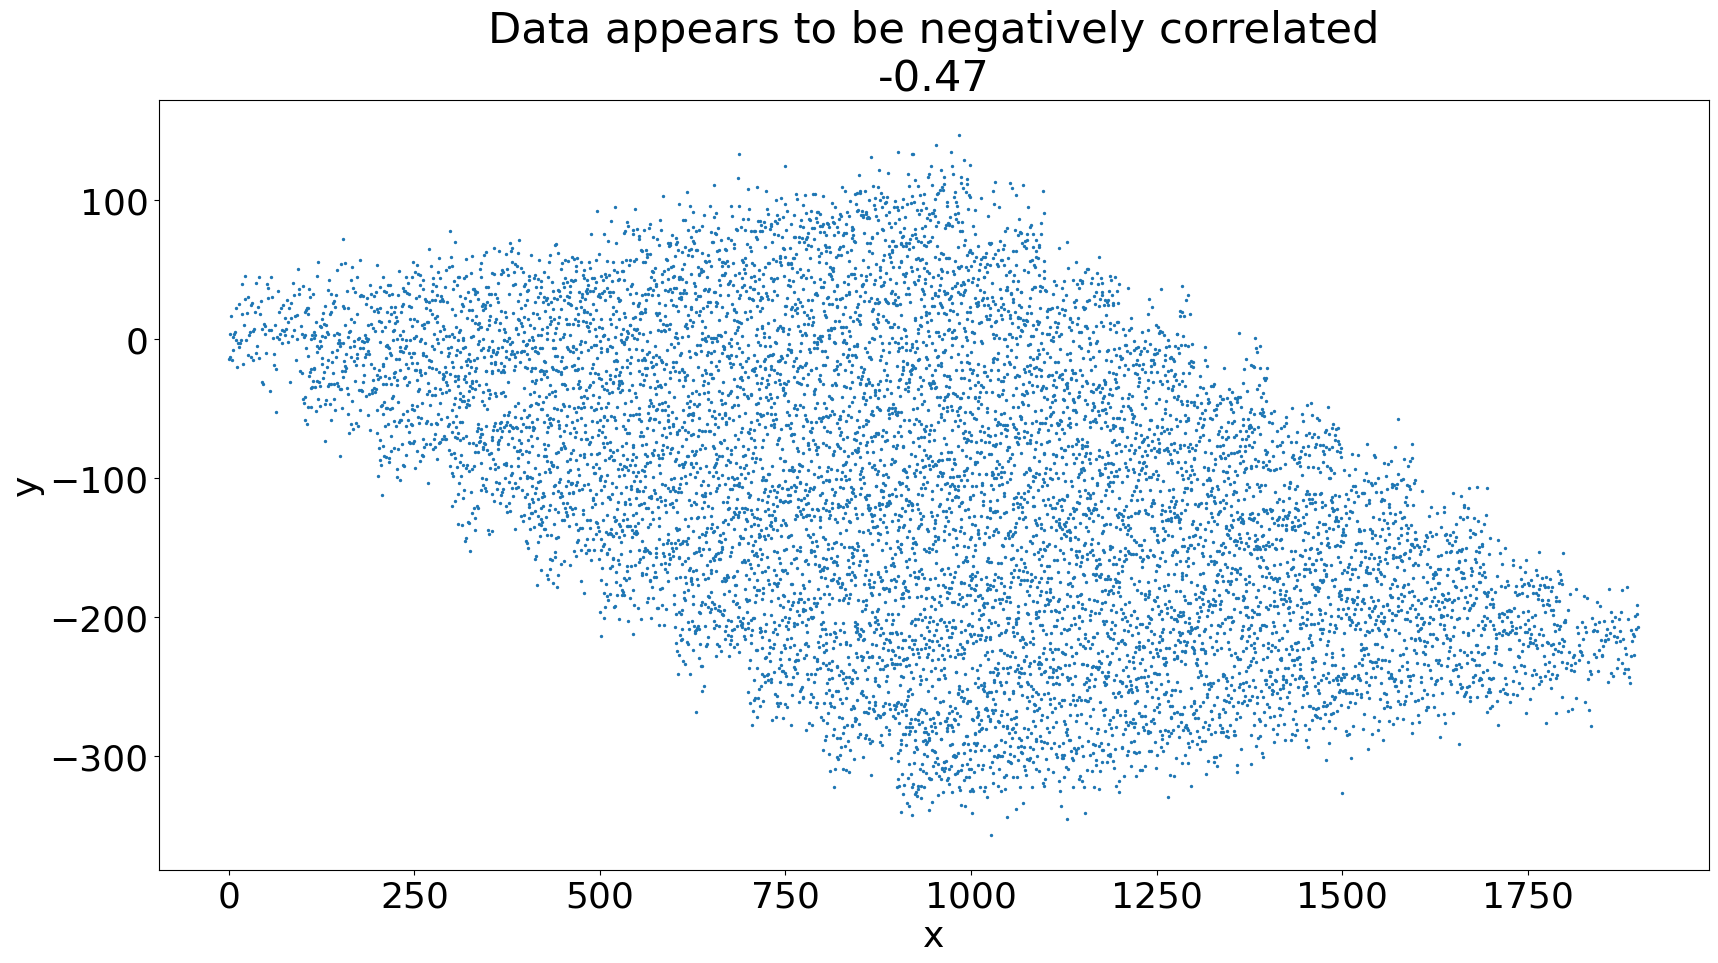

In [88]:
plt.rcParams.update({"font.size":26})
fig, ax = plt.subplots(figsize = (20,10))
stacked_simpsons.plot.scatter(x = "x",
                              y = "y",
                              s = 2,
                              c = "C0",
                              ax = ax)
pooled_correlation=str(round(correlation(stacked_simpsons["x"],
                                        stacked_simpsons["y"]),2))
ax.set_title(
    "Data appears to be negatively correlated\n" + pooled_correlation)


In [89]:
### !!!! Scary !!!!
corr_by_entity = stacked_simpsons.groupby("Entity").corr().round(2)
corr_by_entity[
    corr_by_entity.index.get_level_values(1) == "x"]["y"]

Entity   
0.0     x    0.82
1.0     x    0.83
2.0     x    0.82
3.0     x    0.82
4.0     x    0.82
5.0     x    0.81
6.0     x    0.81
7.0     x    0.82
8.0     x    0.83
9.0     x    0.82
Name: y, dtype: float64

C:\Users\JLCat\AppData\Local\Temp\ipykernel_25948\1551719708.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab10')


Text(0.5, 1.0, 'With Group Controls Correlations is Positive')

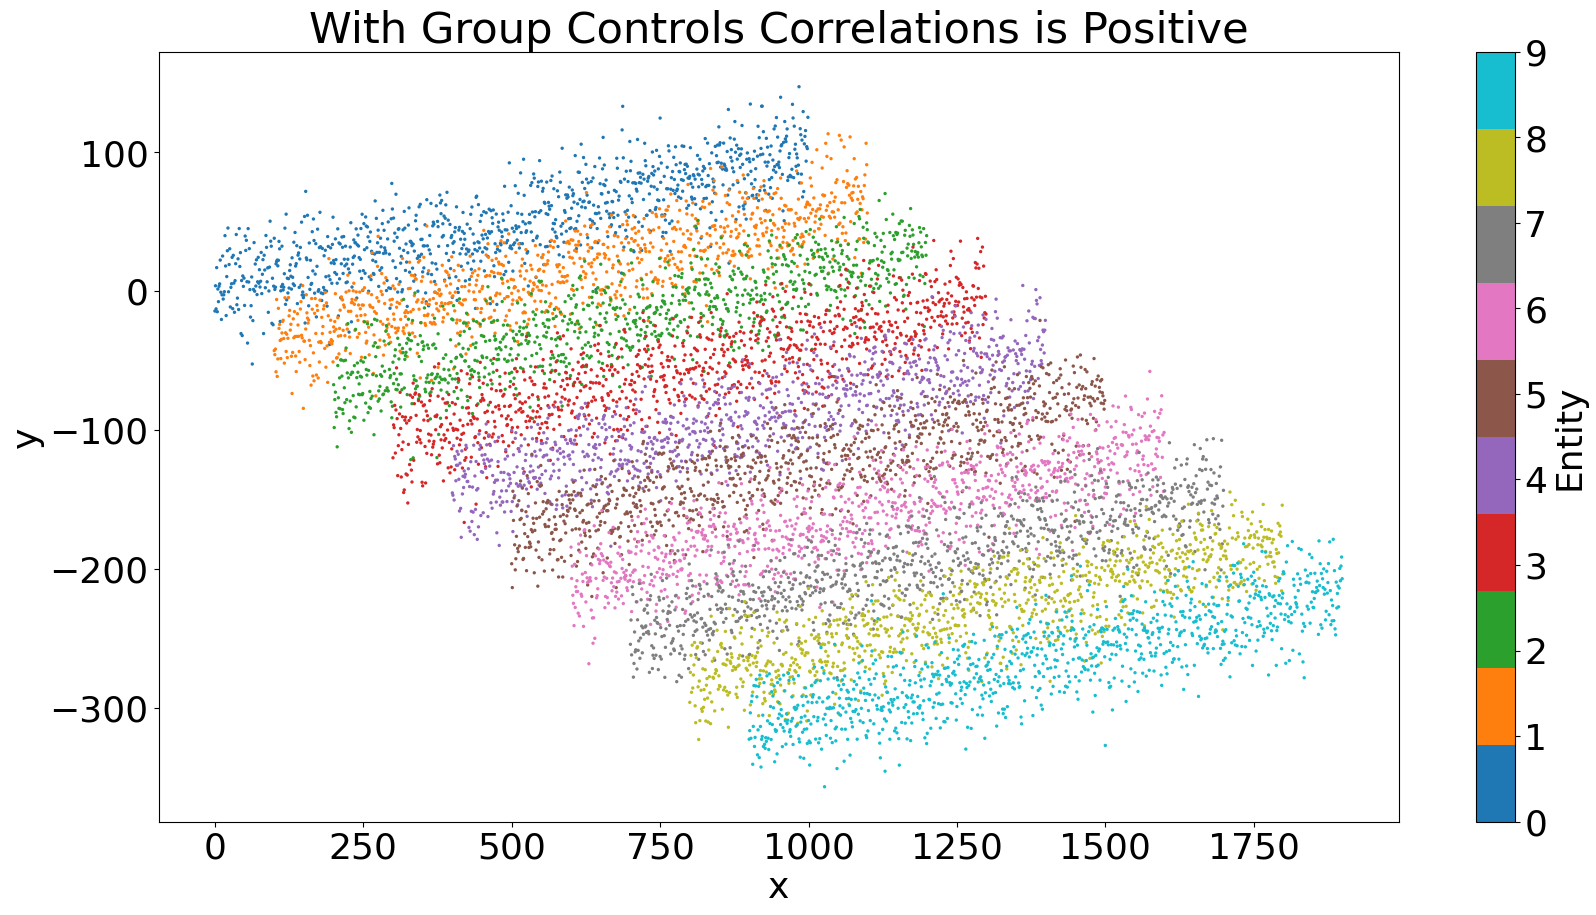

In [90]:
import matplotlib.cm as cm

fig, ax = plt.subplots(figsize=(20, 10))

cmap = cm.get_cmap('tab10')

stacked_simpsons.plot.scatter(x="x",
                              y="y",
                              s=2,
                              # color by entity
                              c="Entity",
                              cmap="tab10", 
                              ax=ax)

ax.set_title("With Group Controls Correlations is Positive")
